# 線形回帰

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

市町村別の総人口、完全失業者数、刑法犯認知件数のデータを読み込み  
2005年調査実施データ  
政府統計e-Statより引用

In [2]:
data = pd.read_csv('../data/crime_data.csv')
data

,id,area,population,unemployee,crime
0,1101,北海道 札幌市 中央区,202801,6542,6118
1,1102,北海道 札幌市 北区,272877,9277,4615
2,1103,北海道 札幌市 東区,253996,9448,4114
3,1104,北海道 札幌市 白石区,201307,8606,4132
4,1105,北海道 札幌市 豊平区,209428,7464,3231
...,...,...,...,...,...
1833,47361,沖縄県 久米島町,9177,530,58
1834,47362,沖縄県 八重瀬町,25121,1145,245
1835,47375,沖縄県 多良間村,1370,32,11
1836,47381,沖縄県 竹富町,4192,72,55


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1838 non-null   int64 
 1   area        1838 non-null   object
 2   population  1838 non-null   int64 
 3   unemployee  1838 non-null   int64 
 4   crime       1838 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.9+ KB


## EDA

記述統計

In [30]:
data.describe()

,id,population,unemployee,crime
count,1838.000000,1838.000000,1838.000000,1838.000000
mean,21299.594668,68377.821001,2086.035365,1213.742111
std,14189.959120,102405.780050,3190.494082,2179.732544
min,1101.000000,438.000000,1.000000,0.000000
25%,8526.250000,10484.250000,273.250000,79.000000
50%,20542.000000,30922.000000,860.000000,313.000000
75%,32525.750000,80548.500000,2476.000000,1286.500000
max,47382.000000,841165.000000,29079.000000,22642.000000


可視化

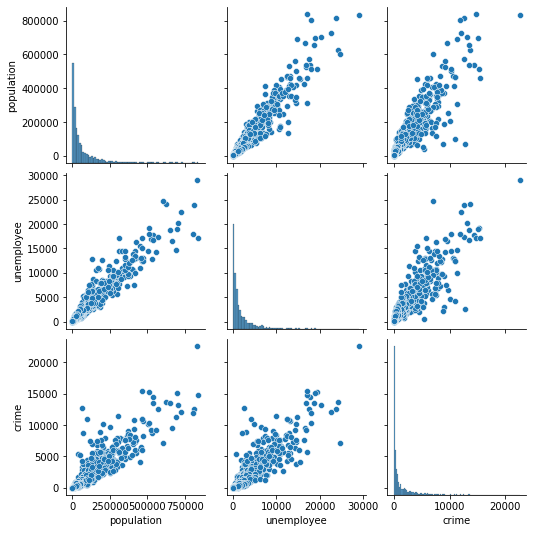

In [5]:
data2 = data.drop(['id', 'area'], axis=1)
sns.pairplot(data2)

## 最小二乗法

In [5]:
# 最小二乗法の関数を定義
def my_ols(X, y):
    # データ型を整える
    Xtmp = X.reshape(-1,1)
    ytmp = y.reshape(-1,1)
    fmat = np.append(np.ones(Xtmp.shape), Xtmp, axis=1)
    
    # 正規方程式を解く
    beta = np.linalg.pinv(fmat.T.dot(fmat)).dot(fmat.T).dot(ytmp)
    
    return beta

In [6]:
# 回帰結果を可視化する関数を定義
def reg_plot(X, y, beta):
    beta0 = beta[0]
    beta1 = beta[1]
    xmin = min(X)
    xmax = max(X)
    
    plt.scatter(X, y, color='blue')
    plt.plot([xmin,xmax], [beta0+beta1*xmin, beta0+beta1*xmax], color='k')
    plt.xlabel('unemployee')
    plt.ylabel('crime')
    plt.show()

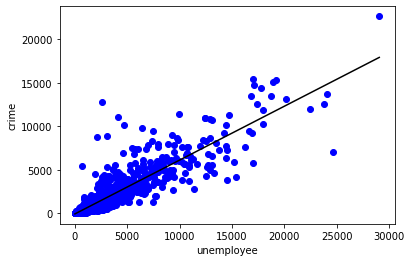

beta0:-76.69718362690853
beta1:0.6186085416194207


In [7]:
# 失業者数と犯罪件数のデータ読み込み
X = data['unemployee'].values
y = data['crime'].values

# 最小二乗法で線形回帰を実行
params = my_ols(X, y)

# 最小二乗法の回帰結果を可視化
reg_plot(X, y, params)
# 最小二乗法の結果求まったパラメータを表示
print('beta0:{}'.format(params[0][0]))
print('beta1:{}'.format(params[1][0]))

In [113]:
# 決定係数を計算
# 全変動
s_all = ((y-y.mean())**2).sum()
# 回帰変動
Xtmp = X.reshape(-1,1)
fmat = np.append(np.ones(Xtmp.shape), Xtmp, axis=1)
pred = fmat.dot(params)
s_reg = ((pred-pred.mean())**2).sum()

# 決定係数
r2 = s_reg/s_all
print('決定係数：{}'.format(r2))

決定係数：0.8198630140076197


## scikit-learnの実装と比べてみる

In [3]:
from sklearn.linear_model import LinearRegression

/var/folders/v6/1f2j3j154zj9g03clj2_yt_00000gn/T/ipykernel_52950/2950025544.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lr_params = np.array([lr.intercept_, lr.coef_])


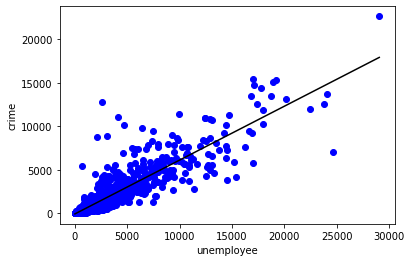

beta0:-76.697183625849
beta1:0.6186085416192684


In [8]:
# 失業者数と犯罪件数のデータ読み込み
X = data['unemployee'].values
y = data['crime'].values

# scikit-learnの線形回帰を実行
lr = LinearRegression().fit(X.reshape(-1,1), y.reshape(-1,1))

# scikit-learnの回帰結果を可視化
lr_params = np.array([lr.intercept_, lr.coef_])
reg_plot(X, y, lr_params)
# scikit-learnが計算したパラメータを表示
print('beta0:{}'.format(lr_params[0][0]))
print('beta1:{}'.format(lr_params[1][0]))

In [116]:
# 決定係数の出力
r2 = lr.score(X.reshape(-1,1),y.reshape(-1,1))
print('決定係数：{}'.format(r2))

決定係数：0.8198630140072154


最小二乗法を自分で実行したときと同じパラメータの値、同じ決定係数が返ってきた

次に、勾配降下法との比較のためにデータを標準化してからscikit-learnを適用してみる  
標準化については追々説明しますので、とりあえず今は「そういう処理があるんだ」くらいに受け取って進めてください

/var/folders/v6/1f2j3j154zj9g03clj2_yt_00000gn/T/ipykernel_52950/1684465176.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lr_params = np.array([lr.intercept_, lr.coef_])


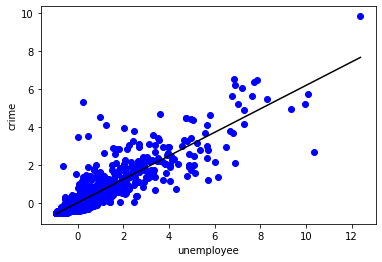

beta0:4.387557899238114e-18
beta1:0.6186085416192679
決定係数：0.8198630140072154


In [11]:
# 失業者数と犯罪件数のデータ読み込み
X = data['unemployee'].values
y = data['crime'].values

# 標準化
X = (X-X.mean())/y.std()
y = (y-y.mean())/y.std()

# scikit-learnの線形回帰を実行
lr = LinearRegression().fit(X.reshape(-1,1), y.reshape(-1,1))

# scikit-learnの回帰結果を可視化
lr_params = np.array([lr.intercept_, lr.coef_])
reg_plot(X, y, lr_params)
# scikit-learnが計算したパラメータを表示
print('beta0:{}'.format(lr_params[0][0]))
print('beta1:{}'.format(lr_params[1][0]))

# 決定係数の出力
r2 = lr.score(X.reshape(-1,1),y.reshape(-1,1))
print('決定係数：{}'.format(r2))

データのスケールが違のでパラメータの値は先ほどと異なるが、決定係数の値は同じものが返ってきている

## 勾配降下法

In [30]:
# 犯罪件数と失業者数のデータを読み込み
X = data['unemployee'].values
y = data['crime'].values

# ************発展的内容2***********************************************
# 「勾配降下法が谷を下って行き過ぎる」という説明に「つまりどういうこと？」となった人向けです
# 発展的内容1をやってから試すことをお勧めします
# 手順①　上で犯罪件数と失業者数のデータを読み込んでいるコード２行をコメントアウトして、以下コード２行をコメント解除してください
# 手順②　発展的内容1の標準化のコードをコメントアウトしてください
# 手順③　実行設定の数字を数字を弄ってみてください（学習率0.2、パラメータの初期値は２つとも5くらいだと「行き過ぎる」がどういうことかイメージしやすいです）
# X = np.random.poisson(2, 100) + np.random.randn(100)
# y = X + np.random.randn(100)
# ********************************************************************

# 勾配降下法を実行
# 実行設定
# ============ここから下の数字を弄って結果がどう変わるかを試してみてください=========
alpha = 0.1 # 学習率
iterations = 1000 # 繰り返し回数
beta0 = 5 # パラメータbeta0の初期値
beta1 = 5 # パラメータbeta1の初期値
# ============弄るのはここまで============================================

# ************発展的内容1***********************************************
# 標準化（何をやっているかは後々説明します）
# 余裕のある人は以下コード２行をコメントアウトして勾配降下法を実行してみてください
# エラーにはならないものの、何だか変な結果になるはずです→「発散」と呼ばれる状態で、これが前処理が必要とされる理由です
X = (X-X.mean())/X.std()
y = (y-y.mean())/y.std()
# ********************************************************************

# beta0とbeta1をまとめてパラメータの列ベクトルbetaを作る
beta = np.append(np.array([[beta0]]), np.array([[beta1]]), axis=1).reshape(-1,1)

# データ型を整える
Xtmp = X.reshape(-1,1)
ytmp = y.reshape(-1,1)
fmat = np.append(np.ones(Xtmp.shape), Xtmp, axis=1)

# 探索過程を保存するハコを用意
J_history = np.zeros(iterations)
beta_history = np.zeros((iterations,2))

# サンプルサイズ取得
n = len(X)
# 勾配を計算
grad = ((fmat.dot(beta)-ytmp).T.dot(fmat)).T / n

# 勾配降下法を実行
for i in range(iterations):
    # パラメータを更新
    beta = beta - alpha*grad
    # 勾配を計算
    grad = ((fmat.dot(beta)-ytmp).T.dot(fmat)).T / n
    # 損失を計算
    J = (fmat.dot(beta)-ytmp).T.dot(fmat.dot(beta)-ytmp) / (2*n)
    
    # 探索過程の損失とパラメータをハコに格納
    J_history[i] = J
    beta_history[i,:] = beta.T

Text(0, 0.5, 'cost function')

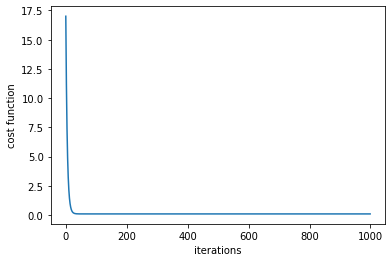

In [31]:
# 損失関数の変化を可視化
plt.plot(J_history)
plt.xlabel('iterations')
plt.ylabel('cost function')

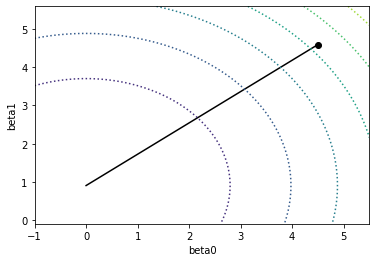

In [34]:
# 勾配降下法の探索過程を可視化
# 黒ポチは上で設定した初期値から最初に更新したbeta、黒ポチから伸びる線の先が最終的に求まったbetaです
plt.scatter(beta_history[0,0], beta_history[0,1], color='k', marker='o')
plt.plot(beta_history[:,0], beta_history[:,1], color='k', linewidth=1.5)
xs = np.linspace(min(beta_history[:,0])-1, max(beta_history[:,0])+1, 100)
ys = np.linspace(min(beta_history[:,1])-1, max(beta_history[:,1])+1, 100)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.append(xmesh.reshape(-1,1), ymesh.reshape(-1,1), axis=1)

n = len(X)
zs = np.zeros(xx.shape[0])
for i in range(len(zs)):
    betatmp = xx[i,:].reshape(-1,1)
    buf = (fmat.dot(betatmp)-ytmp).T.dot(fmat.dot(betatmp)-ytmp) / (2*n)
    zs[i] = buf

plt.contour(xs, ys, zs.reshape(xmesh.shape), linestyles='dotted')
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.show()

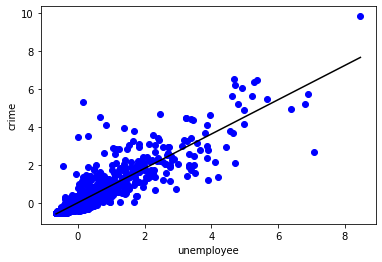

beta0:-6.910942015673085e-18
beta1:0.9054628727933665


In [33]:
# 勾配降下法の回帰結果を可視化
reg_plot(X, y, beta)
# 勾配降下法で求めたパラメータを表示
# 標準化しているため、最小二乗法の結果とスケールが異なっていることに注意してください
print('beta0:{}'.format(beta[0][0]))
print('beta1:{}'.format(beta[1][0]))

In [29]:
# 決定係数を計算
# 全変動
s_all = ((y-y.mean())**2).sum()
# 回帰変動
Xtmp = X.reshape(-1,1)
fmat = np.append(np.ones(Xtmp.shape), Xtmp, axis=1)
pred = fmat.dot(beta)
s_reg = ((pred-pred.mean())**2).sum()

# 決定係数
r2 = s_reg/s_all
print('決定係数：{}'.format(r2))

決定係数：0.8198630140072164


標準化しなかったときの最小二乗法と比べると、標準化の有無によりスケールが違う、つまりパラメータの値は異なるが、決定係数の値は勾配降下法でも同じものが返ってきた  
標準化して行ったscikit-learnの実行結果と比べると、パラメータの値も決定係数もほぼ同じものが返ってきている